In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, PROPERTY, UNION_ALPHA, IMMUTABLE_ALPHA, SEQUENCE, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image, display

parser = load_parser()

cont-view-account=<customer, ibs, mainframe; R_conns; B(context)>
ibs=<cont-visit-bank, cont-deliver-to-spa, cont-spa-view-acc, cont-mob-view-acc; B(context)>
cont-make-payment=<customer, ibs, mainframe; R_conns; B(context)>
cont-send-email=<ibs, email, customer; R_conns; B(context)>
cont-visit-bank=<customer, comp-web-app; R_conns; B(container)>
cont-deliver-to-spa=<web-app, comp-spa; R_conns; B(container)>
cont-spa-view-acc=<customer, comp-spa; R_conns; B(container)>
cont-mob-view-acc=<customer, comp-mob-app; R_conns; B(container)>



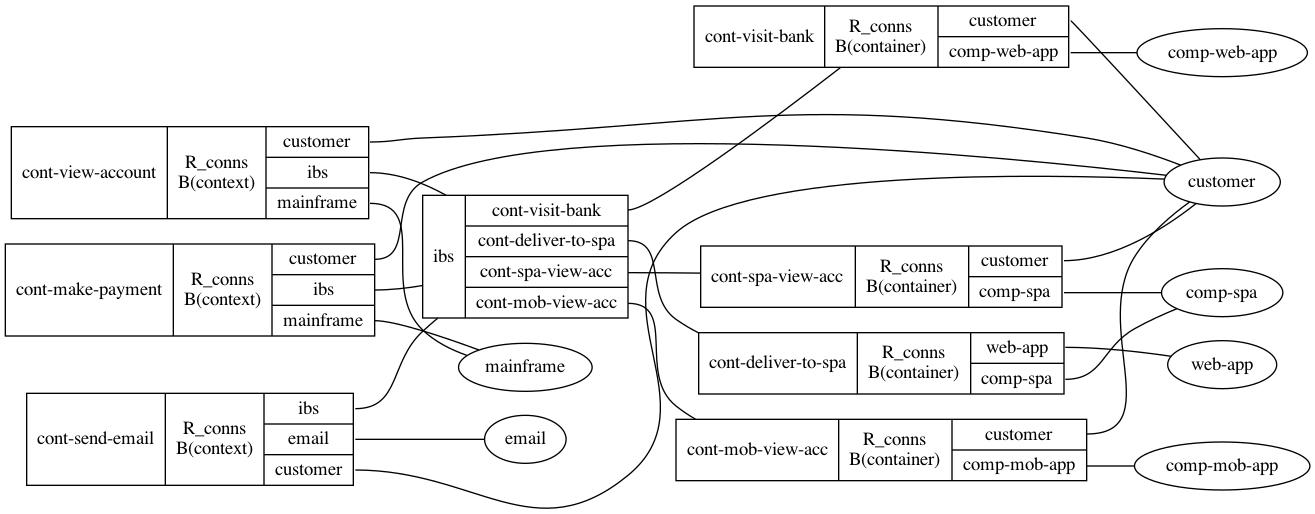

In [2]:
ibs = Hypernetwork()

compile_hn(ibs, parser, """
#    context=<elems=(customer, ibs, email, mainframe), 
#             conns=(cont-view-account, cont-make-payment, cont-send-email); B(context)>
    cont-view-account=<customer, ibs, mainframe; R_conns; B(context)>
    cont-make-payment=<customer, ibs, mainframe; R_conns; B(context)>
    cont-send-email=<ibs, email, customer; R_conns; B(context)>
    ibs=<cont-visit-bank, cont-deliver-to-spa, cont-spa-view-acc, cont-mob-view-acc>
    
#    containers=<cont-elems=(cont-web-app, cont-mob-app, cont-spa, cont-api, cont-db),
#                cont-conns=(cont-visit-bank, cont-deliver-to-spa, cont-spa-view-acc, cont-mob-view-acc); B(container)>
    cont-visit-bank=<customer, comp-web-app; R_conns; B(container)>
    cont-deliver-to-spa=<web-app, comp-spa; R_conns; B(container)>
    cont-spa-view-acc=<customer, comp-spa; R_conns; B(container)>
    cont-mob-view-acc=<customer, comp-mob-app; R_conns; B(container)>
""")

print(ibs)

draw_hn(ibs, fname="/tmp/ibs", view=False, direction="LR", split_camel=False)
Image(filename='/tmp/ibs.png', width=800, height=500)